In [1]:
# module import
import control as ctrl
import matplotlib.pyplot as plt


## 範例一：第一階理想系統的步級響應 (Step Response) 比較

假設被控系統：

$$
G(s) = \frac{1}{s + 1}
$$

1. **不加補償器**

2. **加入 PD 控制器**

$$
C_{PD}(s) = K_p + K_d\,s
$$

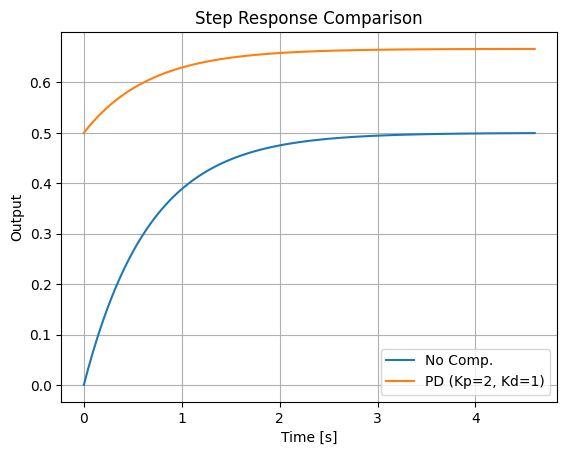

In [2]:
# 定義被控系統
G = ctrl.TransferFunction([1], [1, 1])

# 1) 開環純 G 的閉迴路響應
T0 = ctrl.feedback(G, 1)
t, y0 = ctrl.step_response(T0)

# 2) 加入 PD 控制 C_pd(s) = Kd*s + Kp
Kp, Kd = 2.0, 1.0
C_pd = ctrl.TransferFunction([Kd, Kp], [1])
T_pd = ctrl.feedback(C_pd * G, 1)
t, y_pd = ctrl.step_response(T_pd)

# 繪圖比較
plt.figure()
plt.plot(t, y0,  label='No Comp.')
plt.plot(t, y_pd, label='PD (Kp=2, Kd=1)')
plt.title('Step Response Comparison')
plt.xlabel('Time [s]')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()


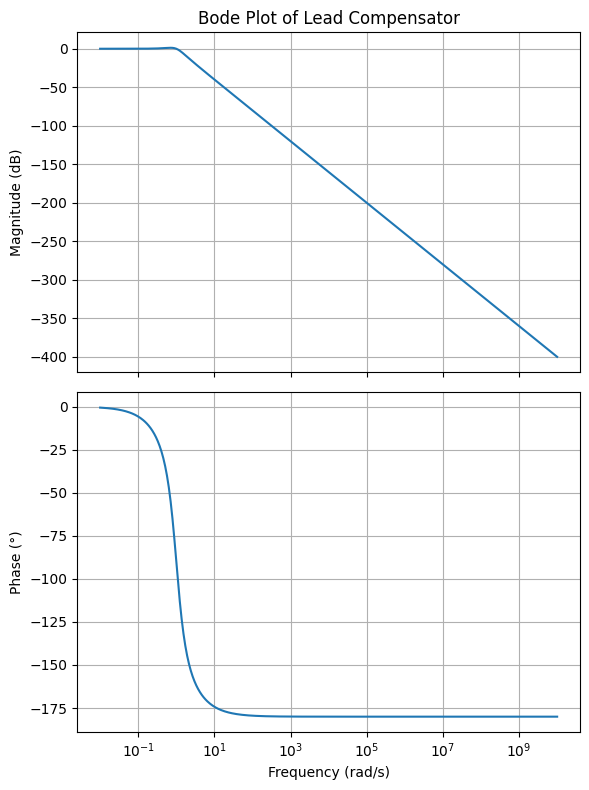

In [ ]:
import numpy as np
# 定義被控系統 G(s) = 1 / (s + 1)
G = ctrl.TransferFunction([1], [1, 1])

# 設計 Lead 補償器 C_lead(s) = K·(s + z) / (s + p)
z, p, K = 5, 20, 1.0
C_lead = K * ctrl.TransferFunction([1, z], [1, p])

# 開環 L(s) = C_lead(s) · G(s)
L = C_lead 

# 定義頻率範圍（rad/s）
omega = np.logspace(-2, 10, 500)

# 計算頻率響應
mag, phase, omega = ctrl.frequency_response(L, omega)

# 繪製 Bode 圖
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 8))

# 幅值 (dB)
ax1.semilogx(omega, 20 * np.log10(mag))
ax1.set_ylabel('Magnitude (dB)')
ax1.set_title('Bode Plot of Lead Compensator')
ax1.grid(True)

# 相位 (度)
ax2.semilogx(omega, np.degrees(phase))
ax2.set_ylabel('Phase (°)')
ax2.set_xlabel('Frequency (rad/s)')
ax2.grid(True)

plt.tight_layout()
plt.show()

Zeros of T_d(s): [-1.+0.j -1.+0.j]
Poles of T_d(s): [-1.+1.j -1.-1.j -1.+0.j]


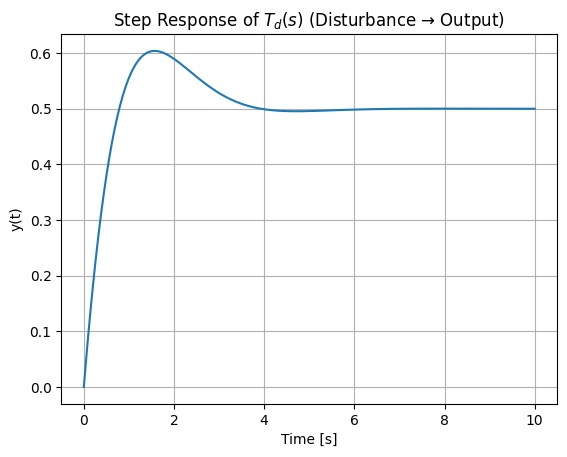

In [25]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# 定義 Plant 與 Controller
G = ctrl.TransferFunction([1], [1, 1])    # G(s) = 1/(s-1)
C = ctrl.TransferFunction([1], [1, 1]) # C(s) = (s-1)/(s+1)

# 開環 L(s)、Sensitivity S(s)、擾動到輸出 T_d(s)
L   = C * G
S   = 1 / (1 + L)
T_d = G * S

# 用 transfer function 物件的 methods 取得零點與極點
z = T_d.zeros()
p = T_d.poles()
print("Zeros of T_d(s):", z)
print("Poles of T_d(s):", p)

# 對單位階躍擾動做 Step Response
t = np.linspace(0, 10, 500)
t, y = ctrl.step_response(T_d, T=t)

# 繪圖
plt.figure()
plt.plot(t, y)
plt.title("Step Response of $T_d(s)$ (Disturbance → Output)")
plt.xlabel("Time [s]")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()

In [27]:
import sympy as sp

# 1. 定義符號
s, c2, c1, c0, d1 = sp.symbols('s c2 c1 c0 d1')

# 2. 定義 Plant 與 Controller
G     = 1/(s**2 + 3*s + 9)           # G(s) = 1/(s^2 + 3s + 9)
D     = (c2*s**2 + c1*s + c0)/(s*(s + d1))  # D(s) = (c2 s^2 + c1 s + c0)/(s (s + d1))

# 3. 計算開環 L(s) 及閉環擾動傳遞的特徵分子 N(s)
L     = sp.simplify(G * D)
N     = sp.expand( s*(s + d1)*(s**2 + 3*s + 9) + (c2*s**2 + c1*s + c0) )
#     N(s) = 分母 * (1 + L) 的分子，多項式形式

# 4. 定義期望的特徵多項式： (s+6)(s+3)(s^2+3s+9)
desired = sp.expand((s+6)*(s+3)*(s**2 + 3*s + 9))

# 5. 建立多項式差：N(s) - desired(s)，並對 s^4 ~ s^0 各階係數設 0
diff = sp.expand(N - desired)
eqs  = [ sp.Eq(diff.coeff(s, i), 0) for i in range(0, 5) ]  # i=0,1,2,3,4

# 6. 解聯立方程式
sol  = sp.solve(eqs, [c2, c1, c0, d1])
print("Solution:", sol)
# 期望輸出： {c2: 18, c1: 54, c0: 162, d1: 9}

Solution: {c0: 162, c1: 54, c2: 18, d1: 9}


# RLC Circuit Control Experiment


## 1. 定義 Plant 並計算基底穩定度指標

這邊要記住控制系統都是1+xs的冪次，而python寫的時候就要用這個方式[1(s), 1]下去寫。

Base GM = 9.97 dB, PM = 32.31°


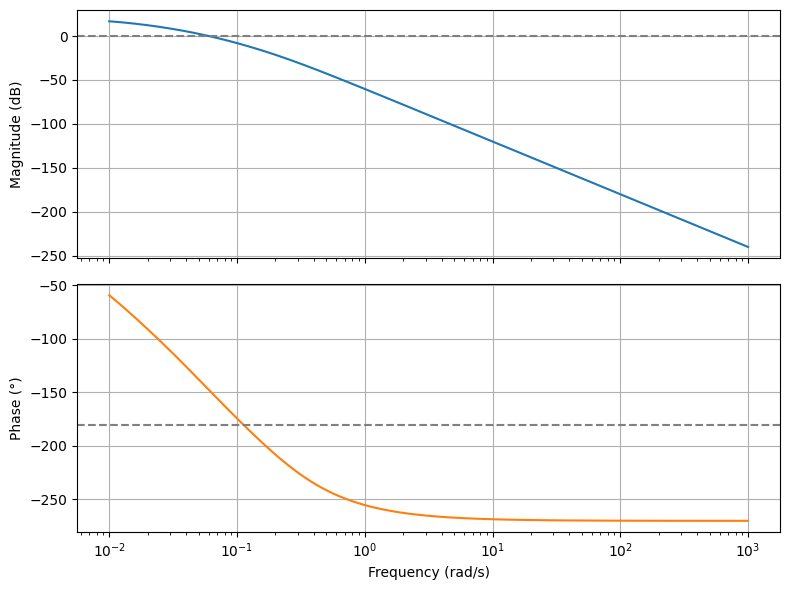

In [23]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# 定義 RLC Plant
G1 = ctrl.TransferFunction([10], [5, 1])
G2 = ctrl.TransferFunction([1], [20, 1])
G3 = ctrl.TransferFunction([1], [100, 1])
G = G1 * G2 * G3

# 計算並顯示 GM/PM
gm0, pm0, wg0, wp0 = ctrl.margin(G)
print(f"Base GM = {20*np.log10(gm0):.2f} dB, PM = {pm0:.2f}°")

omega = np.logspace(-2, 3, 1000)
mag, phase, _ = ctrl.frequency_response(G, omega)
phase_unwrapped = np.unwrap(phase)    # 解除捲包
phase_deg = np.degrees(phase_unwrapped)


# 6. 繪製 Bode 圖
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# 幅值
ax1.semilogx(omega, 20 * np.log10(mag))
ax1.set_ylabel('Magnitude (dB)')
ax1.grid(True)
ax1.axhline(0, color='gray', linestyle='--')

# 相位（已解除捲包）
ax2.semilogx(omega, phase_deg, color='C1')
ax2.set_ylabel('Phase (°)')
ax2.set_xlabel('Frequency (rad/s)')
ax2.grid(True)
ax2.axhline(-180, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

## 2.選取不同目標 GM，計算對應的 P 控制增益 K

In [4]:

import control as ctrl
import numpy as np

# 計算未包裹相位的頻率響應
omega = np.logspace(-2, 3, 2000)
mag, phase, _ = ctrl.frequency_response(G, omega)
phase_unwrapped = np.unwrap(phase)

# 找到第一次相位穿越 -π 的索引
idx = np.where((phase_unwrapped[:-1] > -np.pi) & (phase_unwrapped[1:] <= -np.pi))[0][0]
# 線性內插求出穿越頻率 ω_pc
phi1, phi2 = phase_unwrapped[idx],     phase_unwrapped[idx+1]
w1,    w2    = omega[idx],             omega[idx+1]
omega_pc = w1 + ( -np.pi - phi1) * (w2 - w1) / (phi2 - phi1)

# 在 ω_pc 處插值求幅值 |G(jω_pc)|
mag_pc = np.interp(omega_pc, omega, mag)
gm0    = 1.0 / mag_pc
gm0_db = 20 * np.log10(gm0)
print(f"Unwrapped-based Base GM = {gm0_db:.2f} dB at ω_pc = {omega_pc:.3f} rad/s")

# 目標增益裕度 (dB)
GM_targets_db = [12, 6, 2]
Ks = [10**((gm0_db - gm)/20) for gm in GM_targets_db]
for gm_db, K in zip(GM_targets_db, Ks):
    print(f"Target GM = {gm_db} dB → K = {K:.3f}")


Unwrapped-based Base GM = 9.97 dB at ω_pc = 0.112 rad/s
Target GM = 12 dB → K = 0.791
Target GM = 6 dB → K = 1.579
Target GM = 2 dB → K = 2.502


## 3. Bode 圖比較

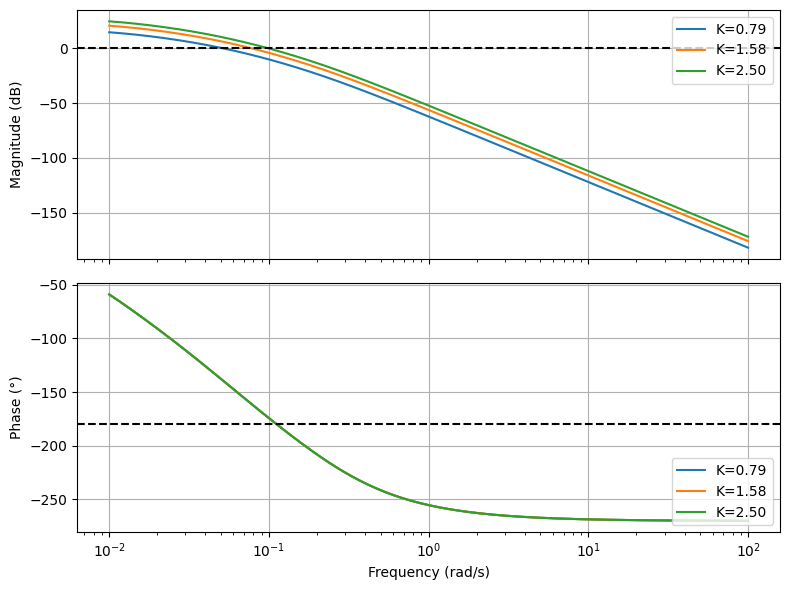

In [5]:
# 先計算原始頻率響應（同一組 omega 共享）
omega = np.logspace(-2, 2, 500)
mag0, phase0, _ = ctrl.frequency_response(G, omega)
phase0_unwrapped = np.unwrap(phase0)
# 目標 GM 所對應的 K (假設已計算好 Ks 清單)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

for K in Ks:
    # 幅值直接用 mag0 * K
    mag = mag0 * K
    
    # 相位先加上 0 (Plant) 且 P controller 無相位貢獻
    # 因此用 phase0_unwrapped 就可以了
    phase_unwrapped = phase0_unwrapped
    
    # 畫幅值
    ax1.semilogx(omega, 20 * np.log10(mag), label=f"K={K:.2f}")
    # 畫相位（解除捲包後轉成度）
    ax2.semilogx(omega, np.degrees(phase_unwrapped), label=f"K={K:.2f}")

# 標示 0 dB 與 -180° 基準線
ax1.axhline(0,    color='k', linestyle='--')
ax2.axhline(-180, color='k', linestyle='--')

ax1.set_ylabel("Magnitude (dB)")
ax2.set_ylabel("Phase (°)")
ax2.set_xlabel("Frequency (rad/s)")

ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

ax1.grid(True)
ax2.grid(True)
plt.tight_layout()
plt.show()

## 4. 時域步階響應與性能指標

=== GM=12 dB, K=0.79 ===
RiseTime:           22.422 s
SettlingTime:       181.865 s
Overshoot:          35.41 %
SteadyStateValue:   0.888

=== GM=6 dB, K=1.58 ===
RiseTime:           14.556 s
SettlingTime:       316.154 s
Overshoot:          61.03 %
SteadyStateValue:   0.940

=== GM=2 dB, K=2.50 ===
RiseTime:           11.538 s
SettlingTime:       874.674 s
Overshoot:          81.08 %
SteadyStateValue:   0.962



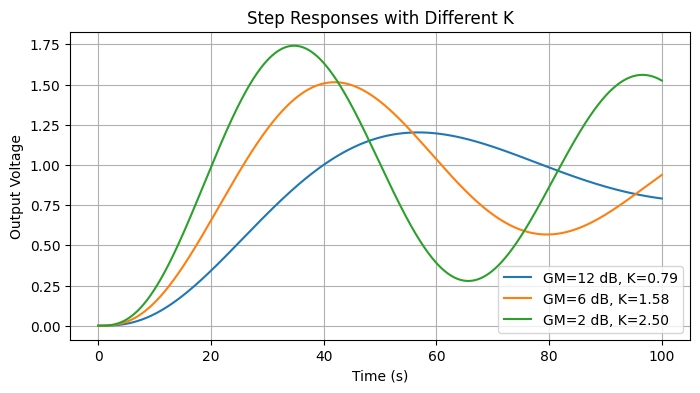

In [13]:
t = np.linspace(0, 100, 300000)

plt.figure(figsize=(8, 4))
for gm_db, K in zip(GM_targets_db, Ks):
    # 閉環傳遞函數
    T_cl = ctrl.feedback(K * G, 1)
    
    # 模擬步級響應
    t_out, y_out = ctrl.step_response(T_cl, T=t)
    plt.plot(t_out, y_out, label=f"GM={gm_db} dB, K={K:.2f}")
    
    # 用 step_info 擷取指標
    info = ctrl.step_info(T_cl)
    print(f"=== GM={gm_db} dB, K={K:.2f} ===")
    print(f"RiseTime:           {info['RiseTime']:.3f} s")
    print(f"SettlingTime:       {info['SettlingTime']:.3f} s")
    print(f"Overshoot:          {info['Overshoot']:.2f} %")
    print(f"SteadyStateValue:   {info['SteadyStateValue']:.3f}")
    print()

# 5. 繪圖格式化
plt.title("Step Responses with Different K")
plt.xlabel("Time (s)")
plt.ylabel("Output Voltage")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# 用 margin 找出原系統的增益裕度 gm0
gm0, pm0, wg0, wp0 = ctrl.margin(G)
print(f"Original GM = {20*np.log10(gm0):.2f} dB, 對應 Ratio = {gm0:.3f}")

# 臨界增益 K_crit = gm0（將開環放大 gm0 倍即到達不穩定邊界）
K_crit = gm0
print(f"K_crit = {K_crit:.3f}")

Original GM = 9.97 dB, 對應 Ratio = 3.150
K_crit = 3.150


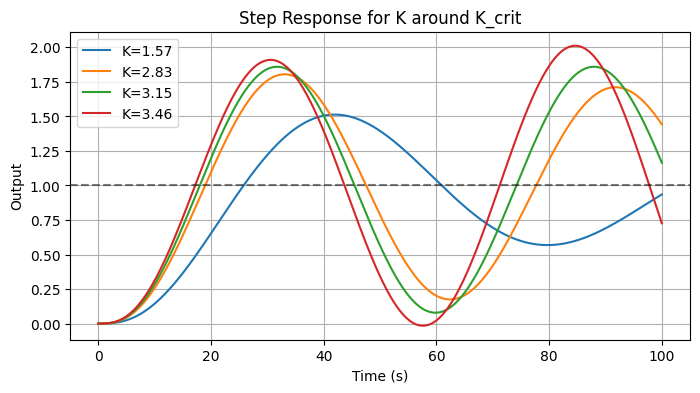

In [17]:
import matplotlib.pyplot as plt

Ks = [0.5*K_crit, 0.9*K_crit, 1.0*K_crit, 1.1*K_crit]
t = np.linspace(0, 100, 30000)

plt.figure(figsize=(8,4))
for K in Ks:
    T_cl = ctrl.feedback(K * G, 1)
    t_out, y_out = ctrl.step_response(T_cl, T=t)
    plt.plot(t_out, y_out, label=f"K={K:.2f}")

plt.title("Step Response for K around K_crit")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.axhline(1, color='k', ls='--', alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()


d:\_10_quantTrade\.venv\Lib\site-packages\control\config.py:363: FutureWarning: keyword 'kvect' is deprecated; use 'gains'
  warnings.warn(
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


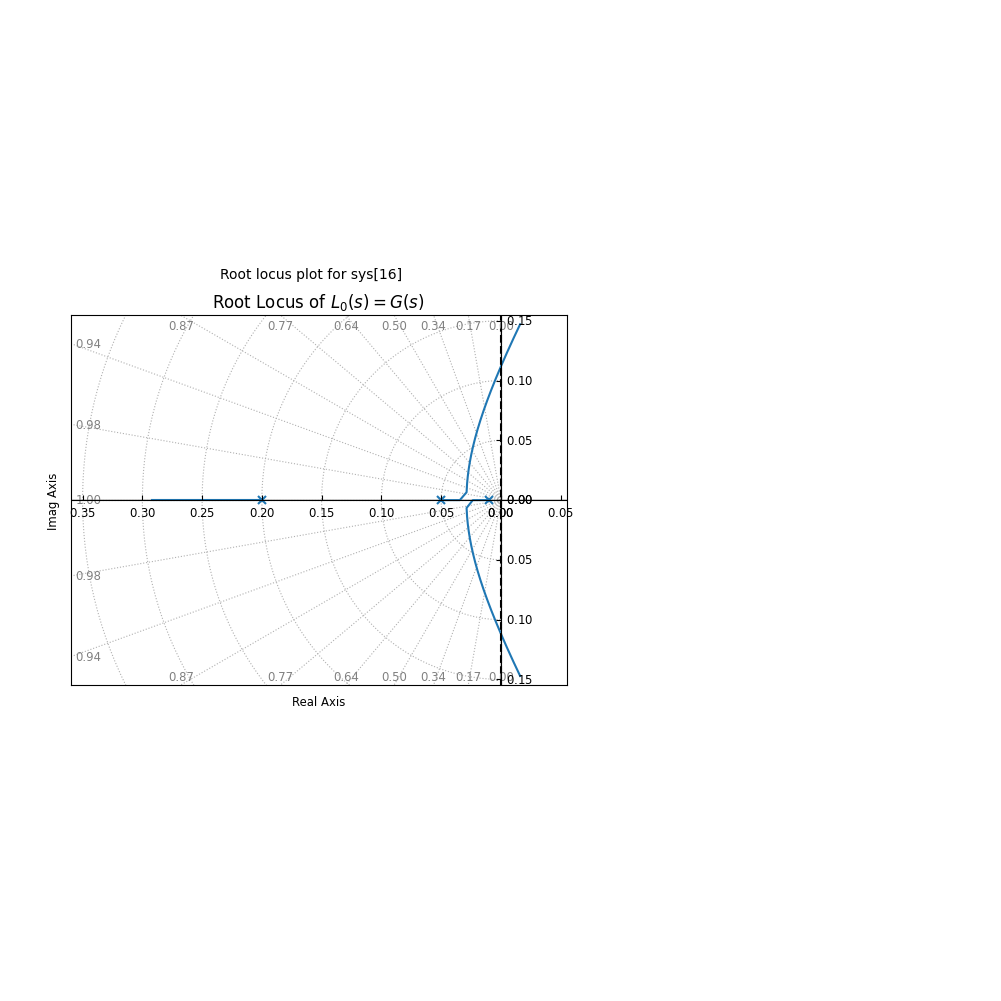

In [19]:
# 只畫 L0(s) = G(s) 的 root locus
ctrl.rlocus(G, kvect=np.linspace(0, 2*K_crit, 500))
plt.title("Root Locus of $L_0(s)=G(s)$")
plt.axvline(0, color='k', ls='--')
plt.xlabel("Real Axis")
plt.ylabel("Imag Axis")
plt.grid(True)
plt.show()

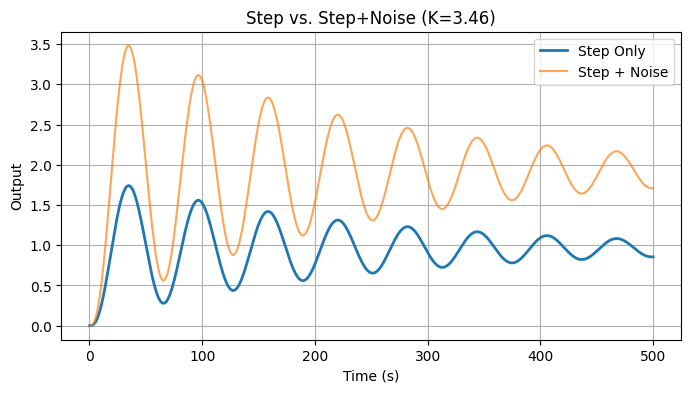

In [35]:
# 1. 參數設定
t = np.linspace(0, 500, 3000000)
noise = 0.3 * np.random.randn(len(t))
K = 1.1 * K_crit             # 取 K_crit 的 1.1 倍
T_cl = ctrl.feedback(2.5*G)

# 1. 階躍響應（No Disturbance）
t_step, y_step = ctrl.step_response(T_cl, T=t)

# 2. 階躍 + 噪訊
#    直接把 U(t) 定義為 1 + noise
U_noise = 2 + noise
t_all, y_all = ctrl.forced_response(T_cl, T=t, U=U_noise)

# 3. 畫圖
plt.figure(figsize=(8,4))
plt.plot(t_step, y_step,       label='Step Only', linewidth=2)
plt.plot(t_all,  y_all, alpha=0.7, label='Step + Noise')
plt.title(f"Step vs. Step+Noise (K={K:.2f})")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()



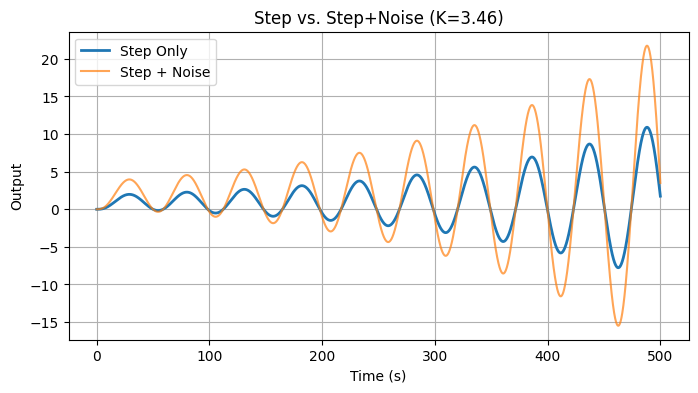


圖一是控制器的增益為4之時，步階響應的輸出對時間關係圖，可以發現隨者時間經過，輸出呈現震盪發散。(標題因為沒有修改所以仍然是3.46)

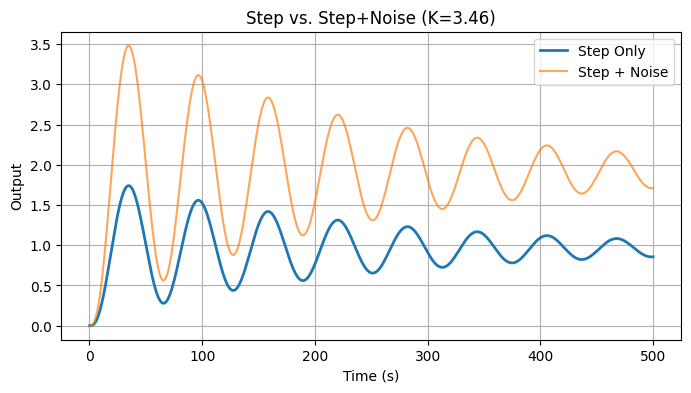


圖二是系統的增益為2.5時，步階響應的輸出對時間關係圖，可以發現隨者時間經過，輸出逐漸收斂。(標題因為沒有修改所以仍然是3.46)